# train without normalized data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
print('tf.__version__=',tf.__version__)

tf.__version__= 2.2.0


In [2]:
cwd = '/home/junkai/potts/data20200918q_3/'
fname = os.path.join(cwd,'train_dataset.npz')

train_datasets = np.load(fname)
print('dataset loaded with labels: ',train_datasets.files)
x_train, x_test, y_train, y_test = [train_datasets[i] for i in train_datasets.files]

dataset loaded with labels:  ['x_train', 'x_test', 'y_train', 'y_test']


In [3]:
class data_generator (keras.utils.Sequence):
    '''
    Data generator class from keras.ultils.Sequence.
    Load data from a file that contains the filenames in the path.
    usage:
    path: Path to the directory containing the data files
    fname_list: Dataset that containing filenames in the specified path
    labels: Labels associated with the loaded train data
    '''
    def __init__(self,path,fname_list,labels,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.labels = labels
        self.batch_size = batch_size
        print('generator for {} files of {} batches of size {}'.format(len(fname_list),self.__len__(),self.batch_size))

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels [idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([np.load(self.path+file) for file in batch_x]),batch_y

In [4]:
train_dir = os.path.join(cwd,'train/')
batch_size = 64

train_generator = data_generator(train_dir,x_train,y_train,batch_size)
validation_generator = data_generator(train_dir,x_test,y_test,batch_size)

generator for 20500 files of 321 batches of size 64
generator for 20500 files of 321 batches of size 64


In [5]:
input_shape = [i for i in train_generator[0]][0][0].shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_generator,
                   steps_per_epoch = train_generator.__len__(),
                   epochs = 20,
                   verbose = 1,
                   validation_data = validation_generator,
                   validation_steps = validation_generator.__len__())

Epoch 1/20
321/321 [==============================] - 14s 42ms/step - loss: 0.7155 - accuracy: 0.6135 - val_loss: 0.7342 - val_accuracy: 0.5162
Epoch 2/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6977 - accuracy: 0.5847 - val_loss: 0.6965 - val_accuracy: 0.5117
Epoch 3/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6847 - accuracy: 0.6045 - val_loss: 0.6769 - val_accuracy: 0.5119
Epoch 4/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6737 - accuracy: 0.6356 - val_loss: 0.6599 - val_accuracy: 0.9545
Epoch 5/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6679 - accuracy: 0.6481 - val_loss: 0.6367 - val_accuracy: 0.5621
Epoch 6/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6624 - accuracy: 0.6664 - val_loss: 0.6540 - val_accuracy: 0.5118
Epoch 7/20
321/321 [==============================] - 13s 41ms/step - loss: 0.6563 - accuracy: 0.6855 - val_loss: 0.6227 - val_accuracy:

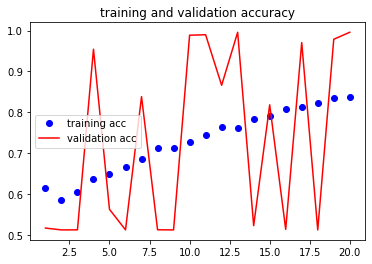

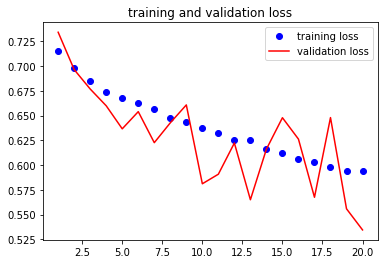

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo',label='training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss, 'bo',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [9]:
fname = os.path.join(cwd,'modelq3.h5')
model.save(fname)

# train with normalized data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
print('tf.__version__=',tf.__version__)

tf.__version__= 2.2.0


In [2]:
cwd = '/home/junkai/potts/data20200918q_3/'
fname = os.path.join(cwd,'train_dataset.npz')

q = int(cwd.split('/')[-2][-1])
train_datasets = np.load(fname)
print('dataset loaded with labels: ',train_datasets.files)
x_train, x_test, y_train, y_test = [train_datasets[i] for i in train_datasets.files]

dataset loaded with labels:  ['x_train', 'x_test', 'y_train', 'y_test']


In [3]:
class data_generator (keras.utils.Sequence):
    '''
    Data generator class from keras.ultils.Sequence.
    Load data from a file that contains the filenames in the path.
    usage:
    path: Path to the directory containing the data files
    fname_list: Dataset that containing filenames in the specified path
    labels: Labels associated with the loaded train data
    '''
    def __init__(self,path,fname_list,labels,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.labels = labels
        self.batch_size = batch_size
        print('generator for {} files of {} batches of size {}'.format(len(fname_list),self.__len__(),self.batch_size))

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]
        batch_y = self.labels [idx * self.batch_size : (idx+1) * self.batch_size]

        #x = np.array([np.load(self.path+file) for file in batch_x])
        #return tf.keras.utils.normalize(x, axis=1),batch_y
        return (np.array([np.load(self.path+file) for file in batch_x])-1)/(q-1),batch_y

In [4]:
train_dir = os.path.join(cwd,'train/')
batch_size = 64

train_generator = data_generator(train_dir,x_train,y_train,batch_size)
validation_generator = data_generator(train_dir,x_test,y_test,batch_size)

generator for 20500 files of 321 batches of size 64
generator for 20500 files of 321 batches of size 64


In [5]:
input_shape = [i for i in train_generator[0]][0][0].shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 16,021
Trainable params: 16,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
history = model.fit(train_generator,
                   steps_per_epoch = train_generator.__len__(),
                   epochs = 20,
                   verbose = 1,
                   validation_data = validation_generator,
                   validation_steps = validation_generator.__len__())

Epoch 1/20
321/321 [==============================] - 13s 42ms/step - loss: 0.5992 - accuracy: 0.9714 - val_loss: 0.5638 - val_accuracy: 0.9988
Epoch 2/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5546 - accuracy: 0.9948 - val_loss: 0.5342 - val_accuracy: 0.9997
Epoch 3/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5347 - accuracy: 0.9973 - val_loss: 0.5218 - val_accuracy: 0.9998
Epoch 4/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5248 - accuracy: 0.9992 - val_loss: 0.5160 - val_accuracy: 1.0000
Epoch 5/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5197 - accuracy: 0.9993 - val_loss: 0.5130 - val_accuracy: 0.9999
Epoch 6/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5166 - accuracy: 0.9996 - val_loss: 0.5113 - val_accuracy: 0.9999
Epoch 7/20
321/321 [==============================] - 13s 41ms/step - loss: 0.5144 - accuracy: 0.9996 - val_loss: 0.5102 - val_accuracy:

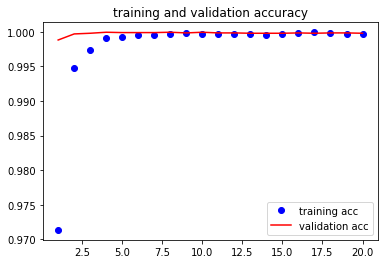

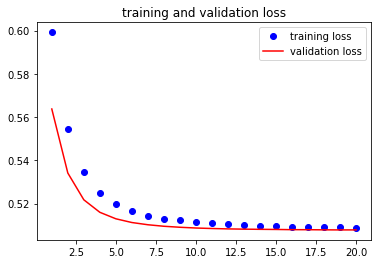

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo',label='training acc')
plt.plot(epochs,val_acc,'r',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss, 'bo',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [10]:
fname = os.path.join(cwd,'model2q{}.h5'.format(q))
model.save(fname)